In [1]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split

C:\Users\Lai Wen Khai\AppData\Local\Temp\ipykernel_776\1944721700.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# --- Dataset Loading and Initial Assessment ---
df = pd.read_csv('C:/um/output/extracted_error_features.csv', dtype={
    'client_ip': str,
    'error_file': str,
    # Other columns needing specific dtypes
})
# Assuming 'df' is your DataFrame
df = df[df['month'].isin([10, 11, 12])]
#df['client_ip'] = df['client_ip'].map(str)
#df['error_file'] = df['error_file'].map(str)

# Convert to strings only if original data types are compatible
df['client_ip'] = df['client_ip'].astype(str) 
df['error_file'] = df['error_file'].astype(str) 


C:\Users\Lai Wen Khai\AppData\Local\Temp\ipykernel_776\4031297432.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/um/output/extracted_error_features.csv', dtype={


In [3]:
# --- Target Transformation ---
df['is_critical_error'] = df['error_level_encoded'] == 3

In [4]:
# Feature selection 
features_to_use = ['pid','client_ip', 'error_file', 'hour', 'day', 'month']  # Adjust this list!
X = df[features_to_use]  
y = df['is_critical_error'].astype(float)

In [5]:
print(y)

290773    0.0
290774    0.0
290775    0.0
290776    0.0
290777    0.0
         ... 
671870    0.0
671871    0.0
671872    0.0
671873    0.0
671874    0.0
Name: is_critical_error, Length: 381102, dtype: float64


In [6]:
# Select categorical columns
categorical_columns = ['client_ip', 'error_file']


In [7]:
from sklearn.preprocessing import OneHotEncoder

def encode_column_in_chunks(df, column_name, chunk_size=10000):
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)  # Dense output for simplicity
    chunks = []
    for i in range(0, len(df), chunk_size):
        df_chunk = df[i:i+chunk_size].copy()
        encoded_chunk = encoder.fit_transform(df_chunk[[column_name]])
        chunks.append(pd.DataFrame(encoded_chunk, index=df_chunk.index))
    return pd.concat(chunks)




In [8]:
# Apply encoding to a copy of the filtered data 
df_encoded = df.copy()  


for col in categorical_columns:
    encoded_data = encode_column_in_chunks(df_encoded.copy(), col)
    df_encoded = pd.concat([df_encoded.drop(col, axis=1), encoded_data], axis=1) 

#loop all column
for col in df_encoded.columns:
    df_encoded[col] = df_encoded[col].astype(str)

# Ensure remaining dtypes are appropriate 
print(df_encoded.info())

C:\Users\Lai Wen Khai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Lai Wen Khai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Lai Wen Khai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in vers

<class 'pandas.core.frame.DataFrame'>
Index: 381102 entries, 290773 to 671874
Data columns (total 73 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   pid                  381102 non-null  object
 1   client_port          381102 non-null  object
 2   error_line           381102 non-null  object
 3   hour                 381102 non-null  object
 4   day                  381102 non-null  object
 5   month                381102 non-null  object
 6   year                 381102 non-null  object
 7   error_level_encoded  381102 non-null  object
 8   is_critical_error    381102 non-null  object
 9   0                    381102 non-null  object
 10  1                    381102 non-null  object
 11  0                    381102 non-null  object
 12  1                    381102 non-null  object
 13  2                    381102 non-null  object
 14  3                    381102 non-null  object
 15  4                    381102 non-nu

In [9]:
# Assuming df_encoded is your DataFrame
prefix = 'review_'

# Get the first 9 columns
first_n_columns = df_encoded.iloc[:, :9]

# Get the columns starting from the 10th column onwards
columns_to_prefix = df_encoded.iloc[:, 9:]

# Add prefix to selected columns
columns_to_prefix = columns_to_prefix.add_prefix(prefix)

# Concatenate the first 9 columns with the modified columns
df_encoded = pd.concat([first_n_columns, columns_to_prefix], axis=1)

In [10]:
print(df_encoded.columns)

Index(['pid', 'client_port', 'error_line', 'hour', 'day', 'month', 'year',
       'error_level_encoded', 'is_critical_error', 'review_0', 'review_1',
       'review_0', 'review_1', 'review_2', 'review_3', 'review_4', 'review_5',
       'review_6', 'review_7', 'review_8', 'review_9', 'review_10',
       'review_11', 'review_12', 'review_13', 'review_14', 'review_15',
       'review_16', 'review_17', 'review_18', 'review_19', 'review_20',
       'review_21', 'review_22', 'review_23', 'review_24', 'review_25',
       'review_26', 'review_27', 'review_28', 'review_29', 'review_30',
       'review_31', 'review_32', 'review_33', 'review_34', 'review_35',
       'review_36', 'review_37', 'review_38', 'review_39', 'review_40',
       'review_41', 'review_42', 'review_43', 'review_44', 'review_45',
       'review_46', 'review_47', 'review_48', 'review_49', 'review_50',
       'review_51', 'review_52', 'review_53', 'review_54', 'review_55',
       'review_56', 'review_57', 'review_58', 'review_5

In [11]:
# Split into features (X) and target (y)
X = df_encoded.drop('error_level_encoded', axis=1)  
y = df_encoded['error_level_encoded']

In [13]:
df_encoded['is_critical_error'] = df_encoded['is_critical_error'].map({'True': 1.0, 'False': 0.0})
df_encoded['is_critical_error'] = df_encoded['is_critical_error'].astype(float)

print(df_encoded.head)


<bound method NDFrame.head of           pid client_port error_line hour day month  year  is_critical_error  \
290773  13641       45752        157    0   1    10  2022                0.0   
290774  13641       45752        164    0   1    10  2022                0.0   
290775  13641       45752        157    0   1    10  2022                0.0   
290776  13641       45752        164    0   1    10  2022                0.0   
290777  13888       56968        164    0   1    10  2022                0.0   
...       ...         ...        ...  ...  ..   ...   ...                ...   
671870  18061       62448        309   23  31    12  2022                0.0   
671871  18061       62448        310   23  31    12  2022                0.0   
671872  18103       58082        259   23  31    12  2022                0.0   
671873  18074       62259        488   23  31    12  2022                0.0   
671874  18074       62259        488   23  31    12  2022                0.0   

       re

In [24]:
from sklearn.impute import SimpleImputer


# Imputation after encoding
imputer = SimpleImputer(strategy='mean')  # Adjust strategy as needed
df_encoded = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42, stratify=y)


In [25]:
print(df_encoded.head())

       pid  client_port  error_line  hour  day  month    year  \
0  13641.0      45752.0       157.0   0.0  1.0   10.0  2022.0   
1  13641.0      45752.0       164.0   0.0  1.0   10.0  2022.0   
2  13641.0      45752.0       157.0   0.0  1.0   10.0  2022.0   
3  13641.0      45752.0       164.0   0.0  1.0   10.0  2022.0   
4  13888.0      56968.0       164.0   0.0  1.0   10.0  2022.0   

   is_critical_error  review_0  review_1  ...  review_52  review_53  \
0                0.0       1.0   0.01235  ...        0.0        0.0   
1                0.0       1.0   0.01235  ...        0.0        0.0   
2                0.0       1.0   0.01235  ...        0.0        0.0   
3                0.0       1.0   0.01235  ...        0.0        0.0   
4                0.0       1.0   0.01235  ...        0.0        0.0   

   review_54  review_55  review_56  review_57  review_58  review_59  \
0        0.0        0.0   0.009143   0.002375     0.0138   0.033633   
1        0.0        0.0   0.009143   0.0

In [26]:
from sklearn.ensemble import RandomForestClassifier 

# Random Forest Model and Parameter Tuning with GridSearchCV
rf_model = RandomForestClassifier(random_state=42)


In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 8, 15] 
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5) 
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 8, 15],
                         'n_estimators': [50, 100, 200]})

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluation
y_pred = best_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
# ... Other metrics ... 
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9861061912071476
Confusion Matrix:
 [[46338    73     0]
 [  984 28709     0]
 [    2     0   115]]


<Axes: xlabel='Predicted', ylabel='Actual'>

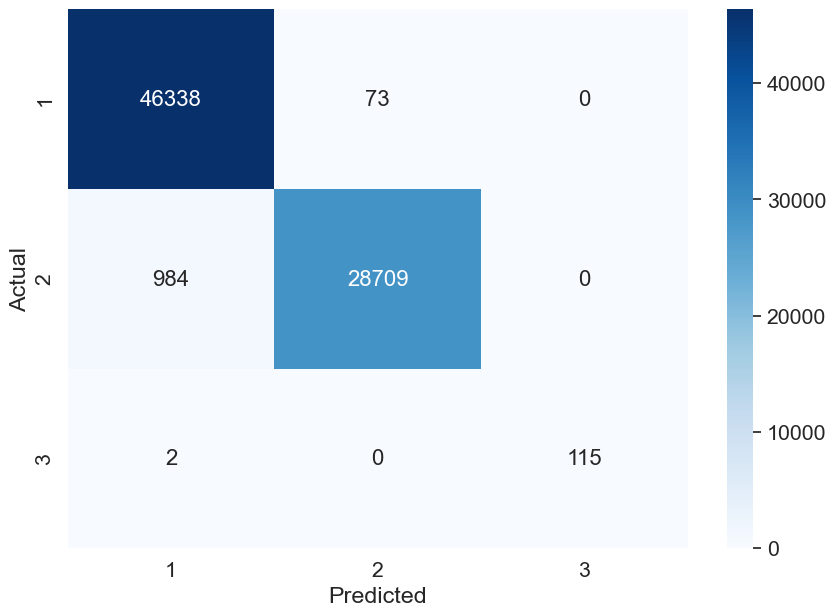

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='g')